In [2]:
import pandas as pd

In [3]:
data = pd.read_csv(r"/content/weatherAUS.csv")

In [4]:
data.shape  

(43371, 23)

In [5]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [6]:
col = ['Rainfall', 'Humidity3pm', 'Pressure9am', 'RainToday', 'RainTomorrow']
data = data[col]

In [7]:
data['RainToday'].replace({'No': 0, 'Yes': 1}, inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1}, inplace = True)

In [8]:
data = data.dropna(how='any')

In [9]:
dataset = data.values
dataset

array([[6.0000e-01, 2.2000e+01, 1.0077e+03, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 2.5000e+01, 1.0106e+03, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 3.0000e+01, 1.0076e+03, 0.0000e+00, 0.0000e+00],
       ...,
       [2.0000e-01, 3.1000e+01, 1.0019e+03, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 6.7000e+01, 1.0178e+03, 0.0000e+00, 0.0000e+00],
       [0.0000e+00, 5.1000e+01, 1.0085e+03, 0.0000e+00, 0.0000e+00]])

In [10]:
X = dataset[:,0:4]

In [11]:
Y = dataset[:,4]

In [12]:
from sklearn import preprocessing

In [13]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [14]:
X_scale

array([[1.61725067e-03, 2.12121212e-01, 4.57912458e-01, 0.00000000e+00],
       [0.00000000e+00, 2.42424242e-01, 5.06734007e-01, 0.00000000e+00],
       [0.00000000e+00, 2.92929293e-01, 4.56228956e-01, 0.00000000e+00],
       ...,
       [5.39083558e-04, 3.03030303e-01, 3.60269360e-01, 0.00000000e+00],
       [0.00000000e+00, 6.66666667e-01, 6.27946128e-01, 0.00000000e+00],
       [0.00000000e+00, 5.05050505e-01, 4.71380471e-01, 0.00000000e+00]])

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [17]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [18]:
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(24524, 4) (5255, 4) (5256, 4) (24524,) (5255,) (5256,)


In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [58]:
model = Sequential([Dense(32, activation='relu', input_shape=(None,4)),Dense(32, activation='relu'),Dense(1, activation='sigmoid'),])

In [46]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
hist = model.fit(X_train, Y_train,batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10


742/767 [============================>.] - ETA: 0s - loss: 0.5275 - accuracy: 0.7783

767/767 [==============================] - 2s 2ms/step - loss: 0.5261 - accuracy: 0.7782 - val_loss: 0.4875 - val_accuracy: 0.7735
Epoch 2/10
767/767 [==============================] - 2s 2ms/step - loss: 0.4662 - accuracy: 0.7894 - val_loss: 0.4550 - val_accuracy: 0.8082
Epoch 3/10
767/767 [==============================] - 1s 2ms/step - loss: 0.4382 - accuracy: 0.8187 - val_loss: 0.4295 - val_accuracy: 0.8185
Epoch 4/10
767/767 [==============================] - 1s 2ms/step - loss: 0.4138 - accuracy: 0.8216 - val_loss: 0.4101 - val_accuracy: 0.8228
Epoch 5/10
767/767 [==============================] - 2s 2ms/step - loss: 0.3983 - accuracy: 0.8320 - val_loss: 0.4000 - val_accuracy: 0.8337
Epoch 6/10
767/767 [==============================] - 1s 2ms/step - loss: 0.3921 - accuracy: 0.8364 - val_loss: 0.3975 - val_accuracy: 0.8344
Epoch 7/10
767/767 [==============================] - 1s 2ms/step - loss: 0.3904 - accuracy: 0.8364 - val_loss: 0.3990 - val_accuracy: 0.8297
Epoch 8/10
767/76

In [48]:
model.evaluate(X_test, Y_test)[1]

165/165 [==============================] - 0s 1ms/step - loss: 0.3997 - accuracy: 0.8297


0.8297184109687805

In [49]:
import matplotlib.pyplot as plt

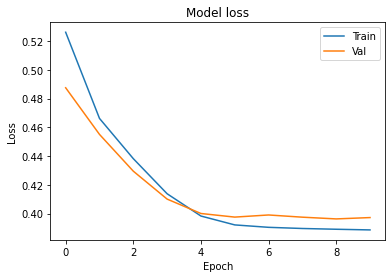

In [50]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

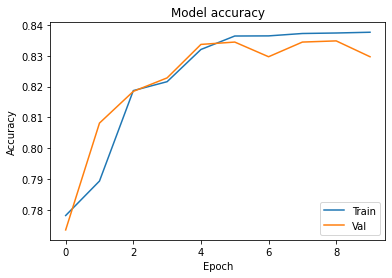

In [51]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()